## <center> Titanic - Data Preprocessing and Visualization </center>

### Import libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Path to the dataset

In [6]:
PATH = './'  # Update the path to your dataset file
titanic_data = pd.read_csv(PATH + 'Titanic-Dataset.csv')

### Train data

In [7]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <center> Visualize and preprocess train data </center>

### Describe data

In [8]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Columns

In [10]:
titanic_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data type of each column

In [11]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Number of missing values

In [12]:
column_names = titanic_data.columns
for column in column_names:
    print(column + ' - ' + str(titanic_data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


- The columns 'Age' and 'Cabin' contains more null values.

### Insights
- 'Survived' is the target column/variable.
- 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
- 'Age' and 'Embarked' has less number of missing value. We have to impute them using different techniques.
- As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
- 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values. 
- We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'.

### Visualization of 'Survived' (Target column)
- As we know, majority of passengers couldn't survive.
- Data is imbalanced.

In [13]:
titanic_data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

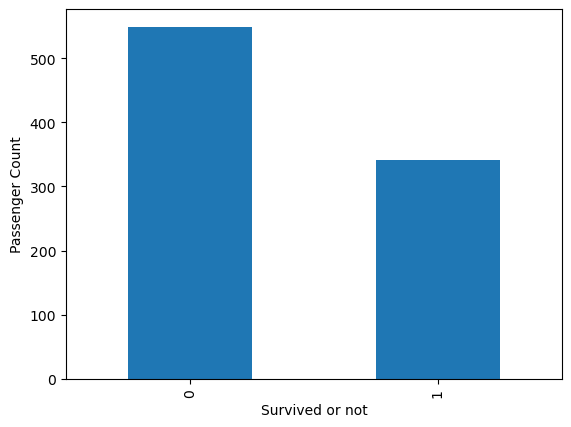

In [15]:
plt = titanic_data['Survived'].value_counts().plot(kind='bar')

plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

### Pclass
- Majority of them are from 3rd class.

Text(0, 0.5, 'Survival Probability')

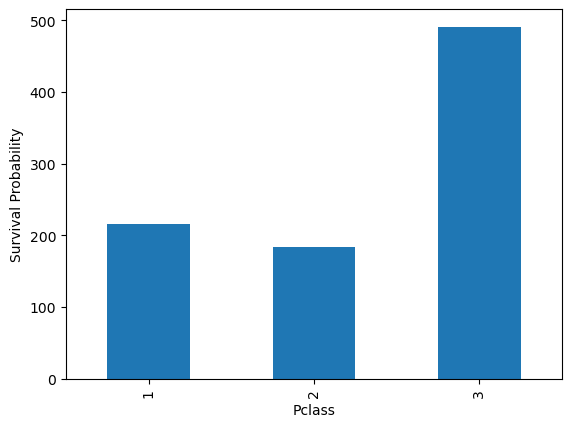

In [17]:
plt = titanic_data['Pclass'].value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Survival Probability')

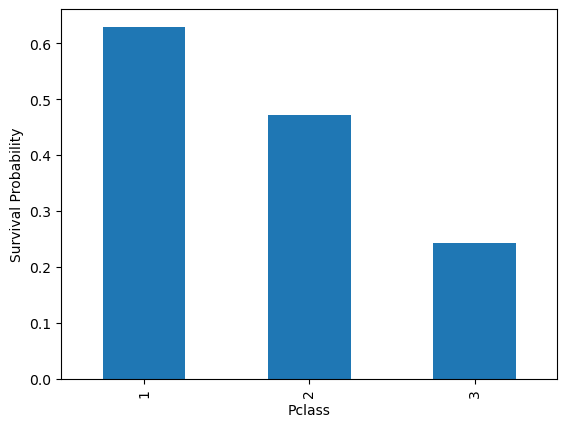

In [19]:
plt = titanic_data[['Pclass', 'Survived']].groupby('Pclass').mean()['Survived'].plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')


### Sex
- Majority of them are Male.

Text(0, 0.5, 'Passenger count')

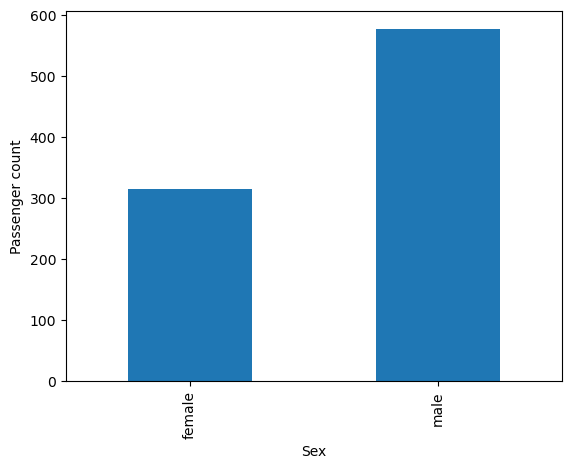

In [21]:
plt = titanic_data['Sex'].value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

### Sex - Survival probability
- As we see, the survival probaility for Female is more. They might have given more priority to female than male.

Text(0, 0.5, 'Survival Probability')

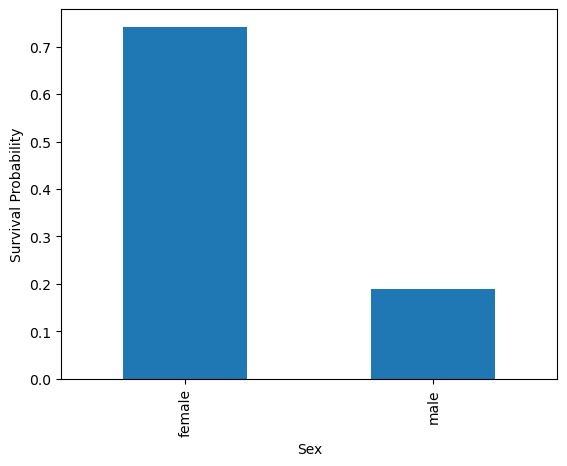

In [22]:
plt = titanic_data[['Sex', 'Survived']].groupby('Sex').mean()['Survived'].plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

### Embarked
- Most of them are from Southampton(S).

Text(0, 0.5, 'Passenger count')

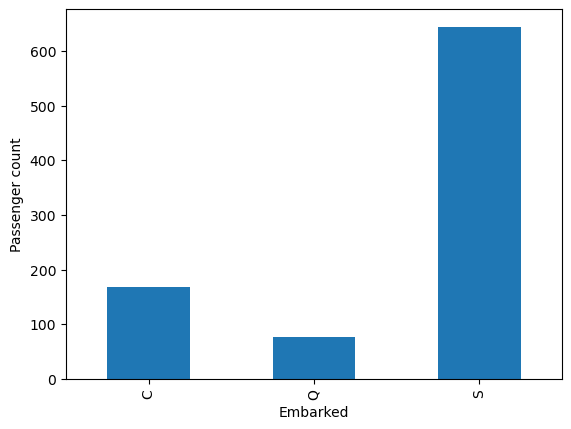

In [24]:
plt = titanic_data['Embarked'].value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

### Embarked - Survival probability
- Survival probability: C > Q > S

Text(0, 0.5, 'Survival Probability')

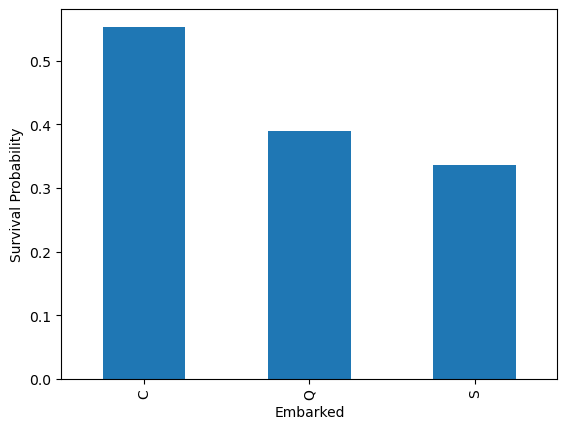

In [25]:
plt = titanic_data[['Embarked', 'Survived']].groupby('Embarked').mean()['Survived'].plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

### SibSp - Siblings/Spouse

Text(0, 0.5, 'Passenger count')

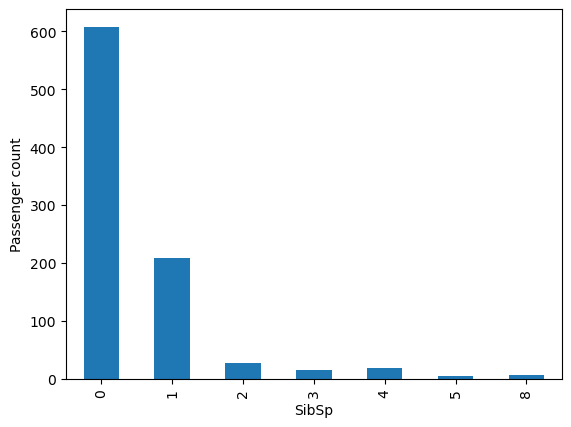

In [26]:
plt = titanic_data['SibSp'].value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger count')

- As we can see, majority of them have no Siblings/Spouse.

Text(0, 0.5, 'Survival Probability')

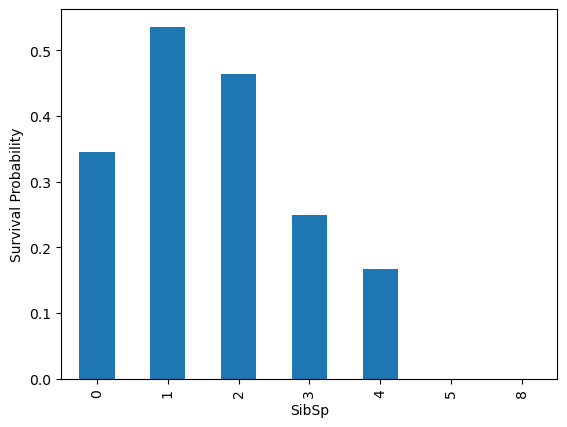

In [27]:
plt = titanic_data[['SibSp', 'Survived']].groupby('SibSp').mean()['Survived'].plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

- The passengers having one sibling/spouse has more survival probability.
- '1' > '2' > '0' > '3' > '4'

### Parch - Children/Parents

Text(0, 0.5, 'Passenger count')

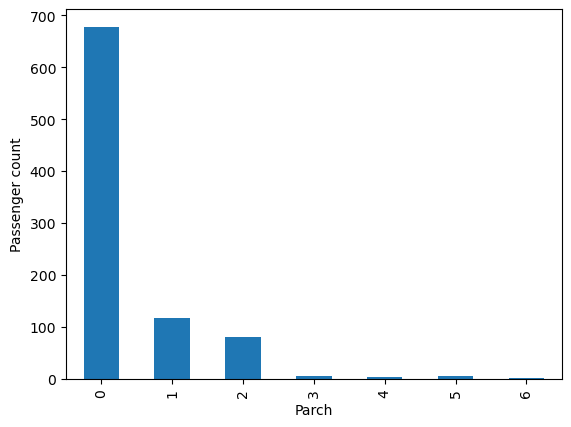

In [28]:
plt = titanic_data['Parch'].value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

- As we can see, majority of them have no Children/Parents.

Text(0, 0.5, 'Survival Probability')

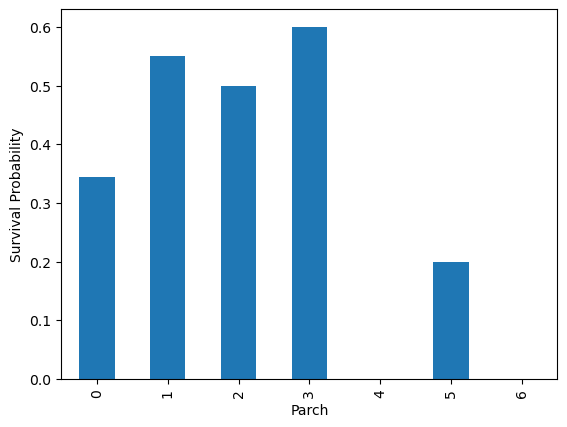

In [29]:
plt = titanic_data[['Parch', 'Survived']].groupby('Parch').mean()['Survived'].plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

- The passengers having three children/parents has more survival probability.
- '3' > '1' > '2' > '0' > '5'

### Embarked vs Pclass

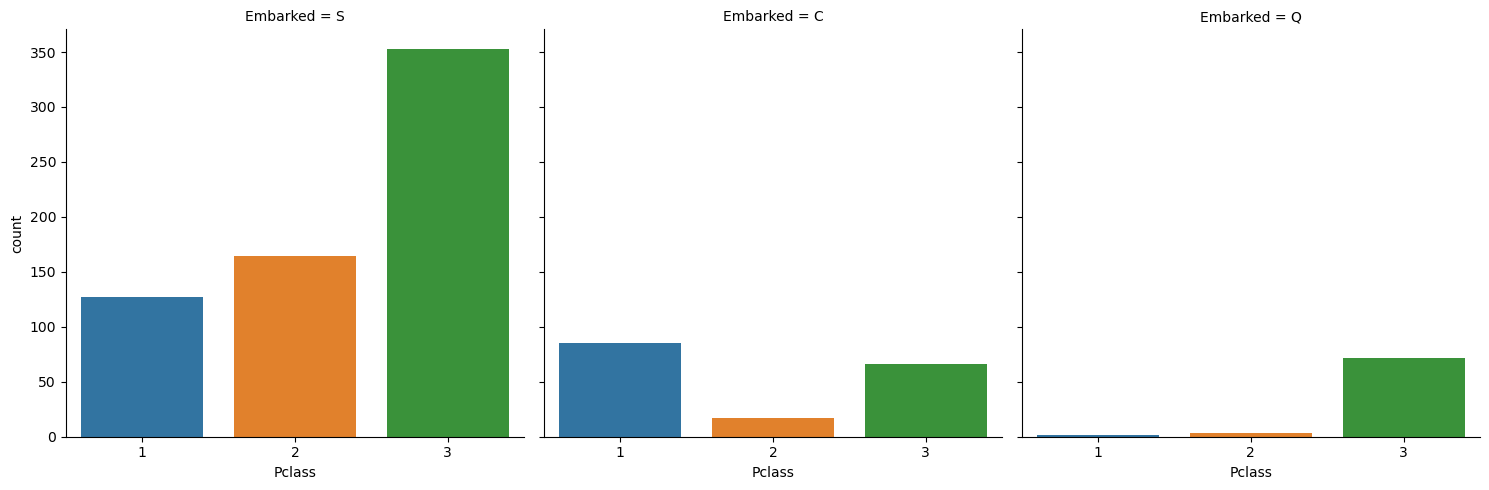

In [31]:
sns.catplot(x='Pclass', col='Embarked', data=titanic_data, kind='count')


### Pclass vs Sex
- Majority of the passengers are Male in every class. But, the survival probability for female is high.

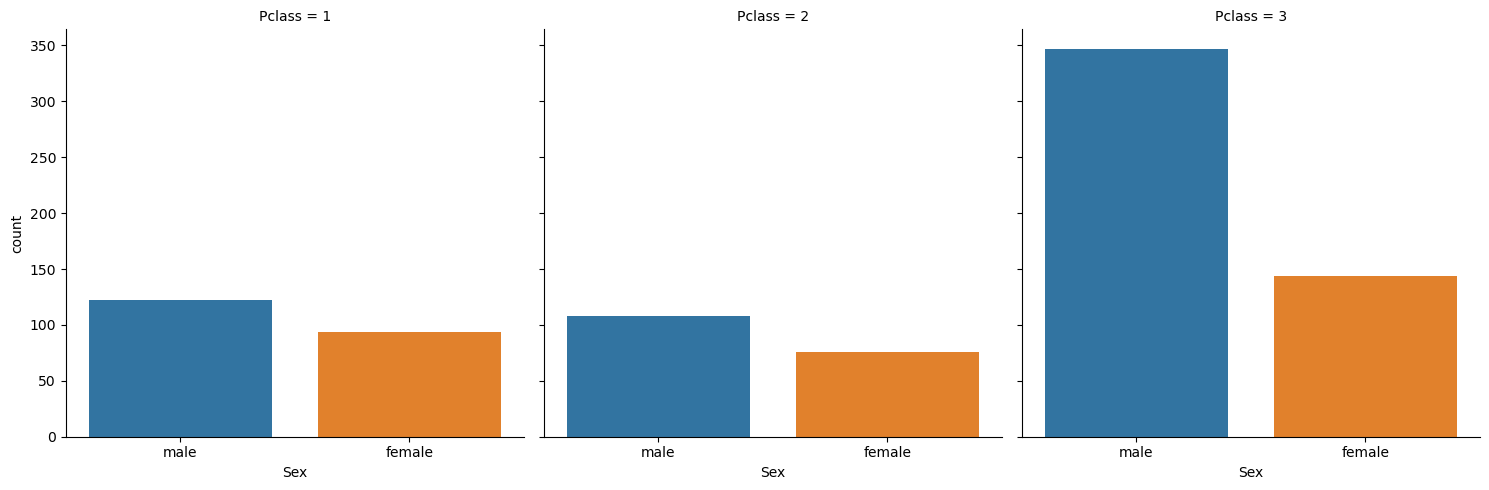

In [32]:
sns.catplot(x='Sex', col='Pclass', data=titanic_data, kind='count')


### Embarked vs Sex

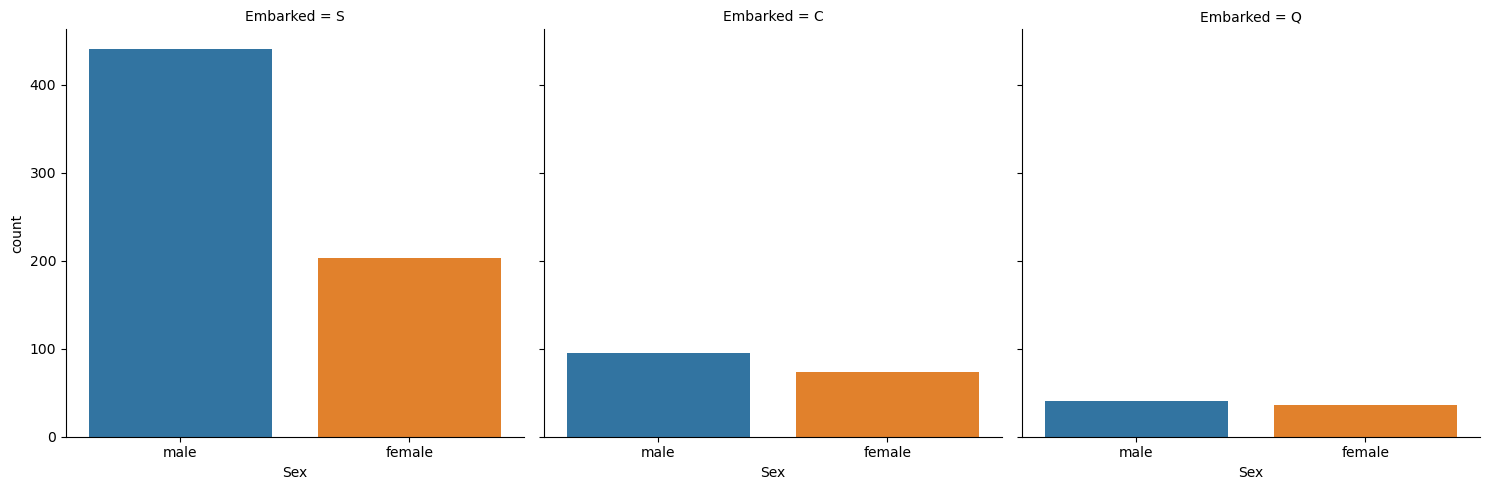

In [33]:
sns.catplot(x='Sex', col='Embarked', data=titanic_data, kind='count')

### Create a new feature 'Family size' from the features 'SibSp' and 'Parch'

In [34]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1


In [36]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Remove unnecessary columns
- We can remove 'Ticket' and 'PassengerId', as they don't contribute to target class.
- Remove 'Cabin' as it has a lot of missing values in both train and test data

In [37]:
titanic_data = titanic_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])


In [38]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


### Map 'Sex' and 'Embarked' to numerical values.

In [39]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [40]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1


### Preprocess 'Name'
- Extarct title from name of the passenger and categorize them.
- Drop the column 'Name'

In [42]:
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_data = titanic_data.drop(columns='Name')


- Combine some of the classes and group all the rare classes into 'Others'.

In [43]:
titanic_data['Title'] = titanic_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace(['Mme', 'Mlle'], 'Miss')


### Map 'Title' to numerical values

In [44]:
title_mapping = {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Others': 4}
titanic_data['Title'] = titanic_data['Title'].map(title_mapping)

In [45]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


### Correlation between columns

In [46]:
corr_matrix = titanic_data.corr()


<Axes: >

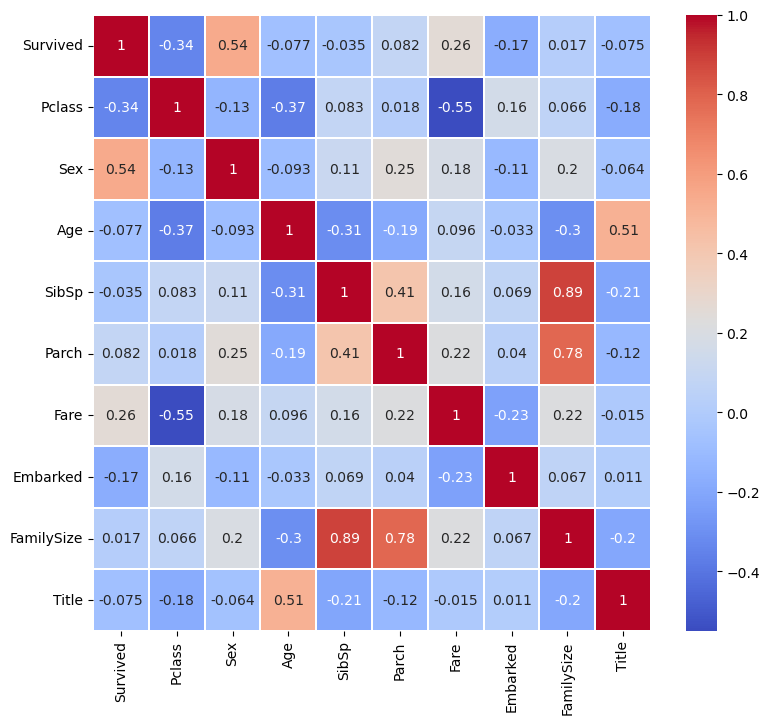

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True, linewidths=0.2)


- There are no very highly correlated columns.

### Handling missing values

In [48]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])


### Impute 'Embarked' with it's majority class.

In [49]:
titanic_data['Embarked'].isnull().sum()

0

### Missing values - 'Age'
- Let's find the columns that are useful to predict the value of Age.

- Age is not correlated with 'Sex' and 'Fare'. So, we don't consider these two columns while imputing 'Sex'.
- 'Pclass', 'SibSp' and 'Parch' are negatively correlated with 'Sex'.
- Let's fill Age with the median age of similar rows from 'Pclass', 'SibSp' and 'Parch'. If there are no similar rows, fill the age with the median age of total dataset.

In [50]:
for index, row in titanic_data[titanic_data['Age'].isnull()].iterrows():
    similar_rows = titanic_data[
        (titanic_data['Pclass'] == row['Pclass']) &
        (titanic_data['SibSp'] == row['SibSp']) &
        (titanic_data['Parch'] == row['Parch'])
    ]
    if not similar_rows.empty:
        titanic_data.at[index, 'Age'] = similar_rows['Age'].median()
    else:
        titanic_data.at[index, 'Age'] = titanic_data['Age'].median()


In [51]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           7
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

In [52]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


## <center> Preprocess test data </center>

### Read test data

In [ ]:
test_data = pd.read_csv(PATH + 'test.csv')

In [ ]:
test_data.isnull().sum()

### Drop 'Ticket', 'PassengerId' and 'Cabin' columns

In [ ]:
test_data = test_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [ ]:
test_data.head()

### Convert 'Sex' and 'Embarked' to Numerical values

In [ ]:
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})
test_data['Embarked'] = test_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [ ]:
test_data.head()

### Extract 'Title' from 'Name' and convert to Numerical values.

In [ ]:
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data = test_data.drop(columns='Name')

test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')

test_data['Title'] = test_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [ ]:
test_data.head()

### Number of missing values

In [ ]:
test_data.isnull().sum()

### Impute 'Age' using median of columns 'SibSp', 'Parch' and 'Pclass'

In [ ]:
NaN_indexes = test_data['Age'][test_data['Age'].isnull()].index

for i in NaN_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == test_data.iloc[i]["SibSp"]) & (train_data.Parch == test_data.iloc[i]["Parch"]) & (test_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        test_data['Age'].iloc[i] = pred_age
    else:
        test_data['Age'].iloc[i] = train_data['Age'].median()

### Impute 'Title' with it's mode

In [ ]:
title_mode = train_data.Title.mode()[0]
test_data.Title = test_data.Title.fillna(title_mode)

### Impute 'Fare' with it's mean

In [ ]:
fare_mean = train_data.Fare.mean()
test_data.Fare = test_data.Fare.fillna(fare_mean)

### Create a new feature 'FamilySize' from 'SibSp' and 'Parch'

In [ ]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [ ]:
test_data.head()

### Split 'train data' into 'training data' and 'validation data'

In [ ]:
train_data.head()

In [ ]:
from sklearn.utils import shuffle
train_data = shuffle(train_data)

In [ ]:
# training_data, valid_data = train_test_split(train_data, test_size=0.2)

In [ ]:
X_train = train_data.drop(columns='Survived')
y_train = train_data.Survived
y_train = pd.DataFrame({'Survived':y_train.values})

In [ ]:
# X_valid = valid_data.drop(columns='Survived')
# y_valid = valid_data.Survived

In [ ]:
X_test = test_data

## <center> Preprocessed data </center>

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.head()

- It's time to use this preprocessed data and apply different modelling algorithms.
- Hope this kernel helps you.
- Don't forget to UPVOTE, if you find this kernel interesting.

### Save data

In [53]:
titanic_data.to_csv('preprocessed_titanic_data.csv', index=False)